# Clasificación

Permite la predicción de respuestas cualitativas (variables categóricas). A las Técnicas de clasificación se les denomina $ \bf{clasificadores} $.

Los clasificadores se aplican sobre conjuntos de $ n $ observaciones (conjuto de entrenamiento) $ \begin{Bmatrix} (x_1, y_1) , (x_2, y_2), \cdots (x_n, y_n) \end{Bmatrix} $. 

### Por qué no usar una regresión lineal para una respuesta cualitativa?

- No hay una forma natural de convertir una variable de respuesta cualitativa con más de dos niveles en una respuesta cuantitativa.
- Una regresión lineal no proporciona una estimación significativa del cálculo de la $ P(Y | X) $.


### Regresión logística

- Se usa para obtener una respuesta cualitativa binaria.
- Se modela la probabilidad que $ Y $ pertenezca a una categoría en particular.

#### Modelo logístico

Función logística:

$$ p(\bf{X}) = \frac{e^{\beta_0 + \beta_1\bf{X}}}{1 + e^{\beta_0 + \beta_1 \bf{X}}} =  \frac{1}{1 + e^{-(\beta_0 + \beta_1 \bf{X})}}$$

- Se ajusta a través del método máxima verosimilitud.


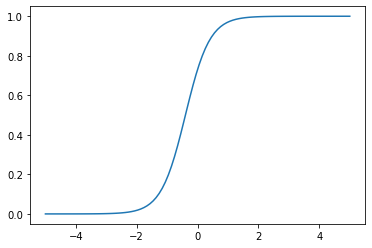

In [2]:
import numpy as np;
import matplotlib.pyplot as plt;

x = np.linspace(-5, 5, 100)
beta_0, beta_1 = 1, 2.5;
linear_model = beta_0 + beta_1 * x;
y = (np.exp(linear_model))/(1 + np.exp(linear_model))

fig, ax = plt.subplots()

ax.plot(x, y)


$$ \frac{p(\bf{X})}{1 - p(\bf{X})} = e^{\beta_0 + \beta_1\bf{X}} $$


### Estimación de los coeficiente de la regresión

Coeficiente $ \beta_0 $ y $ \beta_1 $ son desconocidos. El método más utilizado es el máxima verosimilitud.

#### Función de verosimilitud

$$ L(\beta_0, \beta_1) = \prod_{i:y_i = 1} p(x_i) \prod_{{i}':y_{{i}'} = 0} 1 - p(x_{{i}'}) $$

- $ \beta_0 $ y $ \beta_1 $ se seleccionan para maximizar la función de verosimilitud.


$$ L(\beta_0, \beta_1) = \prod_{i} p(x_i)^{y_i} (1 - p(x_i))^{1-y_i} $$
$$ l(\beta_0, \beta_1) = \sum_{i}^{n} y_i * ln(p(x_i)) + (1-y_i) * ln(1 - p(x_i)) $$
$$ l(\beta_0, \beta_1) = \sum_{i}^{n} y_i * ln \left (\frac{1}{1 + e^{-(\beta_0 + \beta_1 \bf{x_i})}} \right ) + (1-y_i) * ln \left(\frac{e^{-(\beta_0 + \beta_1 \bf{x_i})}}{1 + e^{-(\beta_0 + \beta_1 \bf{x_i})}}\right) $$

$$ l(\beta_0, \beta_1) = \sum_{i}^{n} y_i * (\beta_0 + \beta_1 x_i)  - ln(1 + e^{(\beta_0 + \beta_1 \bf{x_i})})$$

### Problema de maximización

$$ \beta^* = arg\ \underset{\bf{\beta}}{max} \ l(\beta_0, \beta_1)  $$

No se encuentra una solución análitica, por lo tanto, se usa un método numérico.


### Encontrando las derivadas

A través de métodos iterativos se puede encontrar una solución.

- Gradiente
$$ \nabla l(\beta_0, \beta_1) = \sum^{n}_{i=1} \left [ y_i - p(x_i)\right]x_i $$

- Matriz Hessiana
$$ \nabla^2 l(\beta_0, \beta_1) = - \sum_{i}^{n} p(x_i)(1- p(x_i)) x_i^T x_i $$

#### Representación matricial de las derivadas


- Gradiente
$$ \nabla l(\beta_0, \beta_1) = \sum^{n}_{i=1} \left [ y_i - p(x_i)\right]x_i  = \bf{X}^T (\bf{Y} - \bf{\hat{Y}})$$

- Matriz Hessiana
$$ \nabla^2 l(\beta_0, \beta_1) = - \sum_{i}^{n} p(x_i)(1- p(x_i)) x_i^T x_i = - \bf{X}^T \bf{P} (1- \bf{P}) \bf{X}  = - \bf{X}^T \bf{W} \bf{X} $$

#### Proceso iterativo

$$ \bf{\beta^{t+1}} = \bf{\beta^{t}} + (\bf{X}^T \bf{W}^{t} \bf{X})^{-1} \bf{X}^T (\bf{Y} - \bf{\hat{Y}}^{t})$$

### Regresión logística múltiple

Predecir una respuesta binaria usando múltiples predictores.

$$ log \left( \frac{p(\bf{X})}{1 - p(\bf{X})} \right ) = \beta_0 + \beta_1\bf{X} + \cdots + \beta_p \bf{X_p} $$

- El número de predictores utilizado puede generar diferentes resultados, especialmente cuando existe correlación entre los predictores (Confuso).

### Regresión logística multinomial

Clasificación de una respuesta cualitivo de más de dos 2 clases.

$$ P(Y = k| X = x) =  \frac{e^{\beta_{k0} + \beta_{k1}\bf{X} + \cdots + \beta_{kp} \bf{X_p}}}{1 + \sum_{l=1}^{K-1} e^{\beta_{l0} + \beta_{l1}\bf{X} + \cdots + \beta_{lp} \bf{X_p}}} $$





X1
100
(100,)
Y0
[1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0.
 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
X2
(100,)
XData
200
(100, 2)
beta_i  [-20.91734318  15.66685756]
beta_i  [19.51396862 35.81039569]
beta_i  [ 0.85092022 39.40168343]
beta_i  [ 0.64655338 37.80442692]
beta_i  [ 0.62107883 36.20560098]
beta_i  [ 0.58246429 34.610248  ]
beta_i  [ 0.54480526 33.01848135]
beta_i  [ 0.50670416 31.43086639]
beta_i  [ 0.46847771 29.84804325]
beta_i  [ 0.43021079 28.27080574]
beta_i  [ 0.39207266 26.70013774]
beta_i  [ 0.35426481 25.13727388]
beta_i  [ 0.31705203 23.58377989]
beta_i  [ 0.28077431 22.04166342]
beta_i  [ 0.24586708 20.51352669]
beta_i  [ 0.21287453 19.00277698]
beta_i  [ 0.18245227 17.51391619]
beta_i  [ 0.15534345 16.05293572]
beta_i  [ 0.13231383 14.62784582]


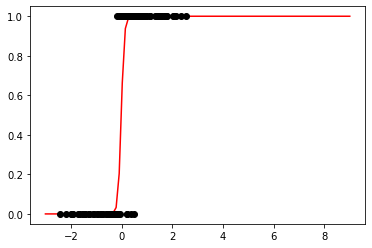

In [18]:
import numpy as np
import matplotlib.pyplot as plt


def p(X, beta):
    fun = 1/(1 + np.exp(-X@beta))
    return fun

def p_1(X, beta):
    fun = 1 - 1/(1 + np.exp(-X@beta))
    return fun

def gradient(X, Y_real, P):
    return X.T @ (Y_real - P)


def gradientDescent(X, beta_0, Y_real):
    p_init = p(X, beta_0)
    g_fun  = gradient(X, Y_real, p_init)
    beta_next = beta_0
    conunter_i = 0
    while(np.linalg.norm(g_fun) >= 0.01):

        beta_next = beta_next + g_fun
        p_i    = p(X, beta_next)
        g_fun  = gradient(X, Y_real, p_i)
        print("beta_i ", beta_next)

        if (conunter_i > 50):
            break
        else:
            conunter_i += 1 

    return beta_next


xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
print("X1")
#print(X)
print(np.size(X))
print(X.shape)
y = (X > 0).astype(float)
print("Y0")
print(y)
X += 0.3 * np.random.normal(size=n_samples)
print("X2")
print(X.shape)
#print(X)
X = X[:, np.newaxis]
ones_m = np.ones(n_samples)
X_data = np.c_[ones_m, X]
print("XData")
#print(X_data)
print(np.size(X_data))
print(X_data.shape)

plt.scatter(X.ravel(), y, label="example data", color="black", zorder=20)

beta_0 = np.array([2, 2])

beta_final = gradientDescent(X_data, beta_0, y)

print(" ======", beta_final)

num_points = 100
x_plot = np.linspace(-3,9,num_points)
ones_m = np.ones(num_points)
x_plot = np.c_[ones_m, x_plot]
p_fun_plot = p(x_plot, beta_final)
plt.plot(x_plot[:, 1], p_fun_plot, label="fun", color="red")
